Parameter containing:
tensor([[ 0.0020,  0.0020, -0.0020, -0.0020, -0.0020,  0.0020,  0.0020,  0.0020,
         -0.0020,  0.0020]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0020,  0.0020, -0.0020, -0.0020, -0.0020,  0.0020,  0.0020,  0.0020,
         -0.0020,  0.0020]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0030,  0.0030, -0.0030, -0.0030, -0.0030,  0.0030,  0.0030,  0.0030,
         -0.0030,  0.0030]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.0030,  0.0030, -0.0030, -0.0030, -0.0030,  0.0030,  0.0030,  0.0030,
         -0.0030,  0.0030]], device='cuda:0', requires_grad=True)


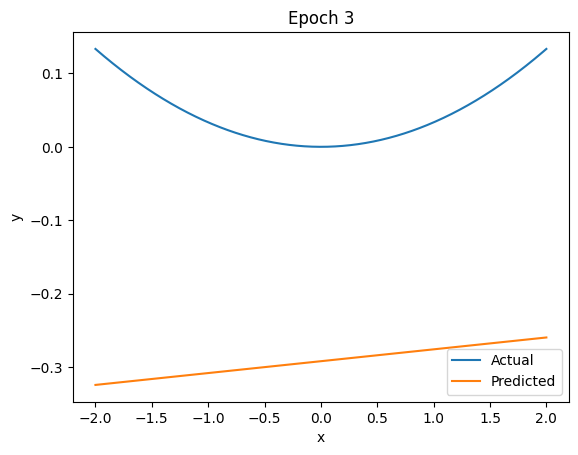

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output
import time
import math

# Generate training data
x_train = np.linspace(-2, 2, 1000, dtype=np.float32)
y_train = x_train ** 2 / 30
x_train, y_train = torch.from_numpy(x_train[:, np.newaxis]), torch.from_numpy(y_train[:, np.newaxis])

class llrelu(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.d = None

    def forward(self, x):
        if self.d is None:
            self.d = x.shape[-1]
        self.forward = self.forward__
        self.w.data = torch.zeros([1 for _ in range(len(x.shape) - 1)] + [self.d], device=x.device, requires_grad=True)
        return self.forward__(x)

    def forward__(self, x):
        y = self.w
        print(y)
        return (1 - y) * x + y * F.softplus(x)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.act1 = llrelu()
        self.act2 = llrelu()
        nn.init.orthogonal_(self.fc1.weight)
        self.fc1.weight = nn.Parameter(self.fc1.weight / math.sqrt(1), requires_grad=True)
        nn.init.orthogonal_(self.fc2.weight)
        self.fc2.weight = nn.Parameter(self.fc2.weight / math.sqrt(10), requires_grad=True)
        nn.init.orthogonal_(self.fc3.weight)
        self.fc3.weight = nn.Parameter(self.fc3.weight / math.sqrt(10), requires_grad=True)


    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act1(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the model
model = Net().to('cuda')

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Train the model
epochs = 5000
for epoch in range(epochs):
    clear_output(wait=True)
    time.sleep(1)
    x_train = x_train.to('cuda')
    y_train = y_train.to('cuda')
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        model.eval()
        y_pred = model(x_train)


    with torch.no_grad():
        x_train = x_train.to('cpu')
        y_train = y_train.to('cpu')
        y_pred = y_pred.to('cpu').detach().numpy()
    
    plt.figure()
    plt.title(f'Epoch {epoch+1}')
    plt.plot(x_train.numpy(), y_train.numpy(), label='Actual')
    plt.plot(x_train.numpy(), y_pred, label='Predicted')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    model.train()

# Visualize things

In [97]:
import torch.nn as nn

p = nn.UninitializedParameter(requires_grad=True)

In [98]:
p.data = torch.randn(5)

In [100]:
p

<UninitializedParameter>

In [94]:
p_ = nn.Parameter(torch.randn(6), requires_grad=True)

In [95]:
p_.data = torch.randn(7)

In [96]:
p_

Parameter containing:
tensor([ 0.1686,  0.3345,  0.0618,  0.1570,  1.0402, -0.9256, -0.1808],
       requires_grad=True)

C:\Users\lenha\AppData\Local\Temp\ipykernel_9956\3348723244.py:69: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
C:\Users\lenha\AppData\Local\Temp\ipykernel_9956\3348723244.py:70: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
C:\Users\lenha\AppData\Local\Temp\ipykernel_9956\3348723244.py:71: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
C:\Users\lenha\AppData\Local\Temp\ipykernel_9956\3348723244.py:73: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))


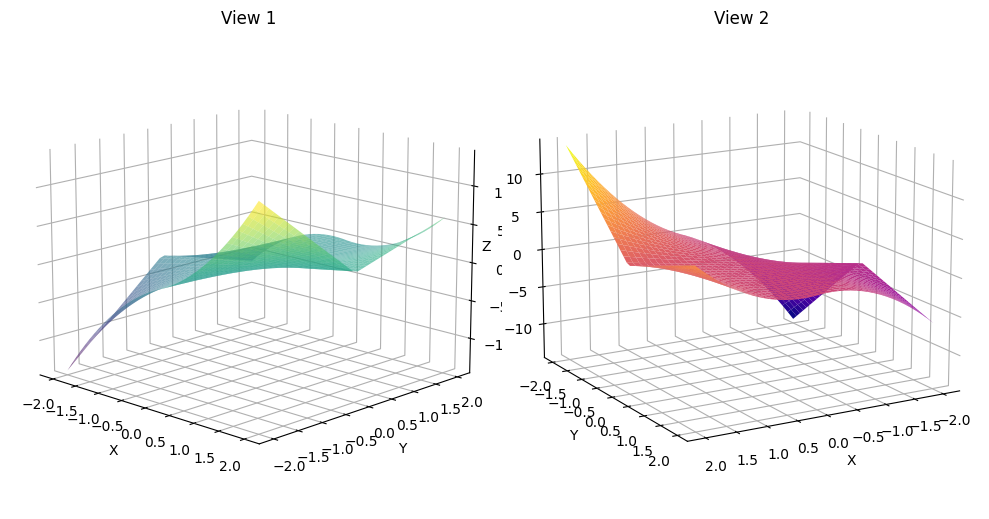

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Define the function
# def f(x, y):
#   """Function to be plotted."""
#   return (y + 1) * x + (y) * np.log(1 + np.exp(x))

# def f(x, y):
#   """
#   This function takes two numbers x and y and returns the maximum of the two.
#   """  
#   term1 = np.maximum(x + y, - y - x)
#   # term1 = term1 * np.abs(term1)
#   term2 = np.minimum(x - y, y - x)
#   # term2 = term2 * np.abs(term2)
#   return term1 + term2
#   # return x * y
#   # return np.log((term1 + term2) - 4 * x * y)
#   # return np.exp(term1) + np.exp(term2)) / (np.exp(term1) + np.exp(term2) + np.exp(term1 * -1) + np.exp(term2 * -1)

# def f(x, y):
#   """Function to be plotted."""
#   # # p = (sigmoid(y * y) - 0.5) * 2
#   # p = y
#   # # return (1 + p) * x + p * np.log(1 + np.exp(x))
#   # return (1 - p) * x + p * np.maximum(x, 0)
#   # return np.maximum(x, y) + np.minimum(x, y) 

def f(x, y):
    return (1 - y) * x + x * np.abs(x * y)

# Create a mesh grid
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)

# Calculate the function values
Z = f(X, Y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 6))

# Create subplots for different views
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot the surface on both subplots
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax2.plot_surface(X, Y, Z, cmap='plasma')

# Set labels and titles for both subplots
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('View 1')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('View 2')

# Adjust viewing angles for each subplot
ax1.view_init(elev=15, azim=-46)
ax2.view_init(elev=15, azim=60)

# Remove unnecessary spines
ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Tight layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn

def maxout(q, k):
    q, k

In [6]:
import torch

x = torch.randn(2, 3, 4, 2)
y = torch.tensor([[0.5, -0.5], [0.5, -0.5]])

In [7]:
x @ y

tensor([[[[ 0.1113, -0.1113],
          [-0.2633,  0.2633],
          [ 1.6365, -1.6365],
          [-0.3138,  0.3138]],

         [[ 0.7092, -0.7092],
          [ 1.0016, -1.0016],
          [-1.0414,  1.0414],
          [-0.7286,  0.7286]],

         [[ 0.1568, -0.1568],
          [-0.2941,  0.2941],
          [-0.6432,  0.6432],
          [ 0.2667, -0.2667]]],


        [[[ 0.9025, -0.9025],
          [-0.5425,  0.5425],
          [ 0.6103, -0.6103],
          [ 0.1507, -0.1507]],

         [[-0.1343,  0.1343],
          [ 0.7973, -0.7973],
          [ 0.6365, -0.6365],
          [ 0.8411, -0.8411]],

         [[-1.3082,  1.3082],
          [ 0.0578, -0.0578],
          [ 0.2076, -0.2076],
          [ 0.3243, -0.3243]]]])

In [35]:
import torch.nn as nn

gaus = torch.randn(4, 5)
# svd = torch.linalg.svd (gaus)
# orth = svd[0] @ svd[2]
orth = torch.qr(torch.randn(in_features, out_features))[0] / math.sqrt(2 * in_features)
print(orth, orth @ orth.T)

tensor([[-0.1105, -0.1353, -0.9700, -0.1689],
        [-0.5542, -0.5945,  0.0449,  0.5809],
        [ 0.1757, -0.7472,  0.1908, -0.6119],
        [ 0.8061, -0.2644, -0.1436,  0.5096]]) tensor([[ 1.0000e+00, -1.6764e-08,  4.4703e-08, -1.4156e-07],
        [-1.6764e-08,  1.0000e+00,  1.4901e-08, -5.9605e-08],
        [ 4.4703e-08,  1.4901e-08,  1.0000e+00,  7.4506e-09],
        [-1.4156e-07, -5.9605e-08,  7.4506e-09,  1.0000e+00]])


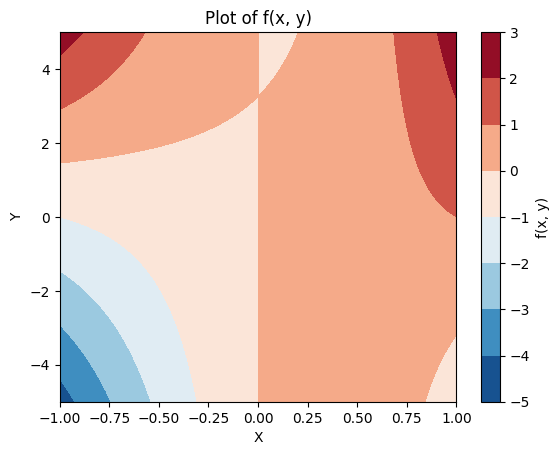

: 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# def f(x, y):
#   """
#   This function takes two numbers x and y and returns the maximum of the two.
#   """  
#   term1 = np.maximum(x + y, - y - x)
#   term1 = term1 * np.abs(term1)
#   term2 = np.minimum(x - y, y - x)
#   term2 = term2 * np.abs(term2)
#   return term1 + term2
#   # return x * y
#   # return np.log((term1 + term2) - 4 * x * y)
#   # return np.exp(term1) + np.exp(term2)) / (np.exp(term1) + np.exp(term2) + np.exp(term1 * -1) + np.exp(term2 * -1)

# def f(x, y):
#   return sigmoid(x) - sigmoid(y)

# Define the function
# def f(x, y):
#   """Function to be plotted."""
#   p1 = sigmoid(x)
#   p2 = sigmoid(y)
#   p = p1 - p2
#   return (p) * x + (1 - p) * np.log(1 + np.exp(x))

# def f(x, y):
#   """Function to be plotted."""
#   p = (sigmoid(y * y) - 0.5) * 2
#   return (1 - p) * x + p * np.log(1 + np.exp(x))

# def f(x, y):
#   """Function to be plotted."""
#   # p = (sigmoid(y * y) - 0.5) * 2
#   p = y
#   return (1 - p) * x + p * np.log(1 + np.exp(x))

# def f(x, y):
#   """Function to be plotted."""
#   # p = (sigmoid(y * y) - 0.5) * 2
#   p = y
#   # return (1 + p) * x + p * np.log(1 + np.exp(x))
#   return (1 - p) * x + p * np.maximum(x, 0)

def f(x, y):
    return (1 - y) * x + y * np.log(1 + np.exp(x)) * x

x = np.linspace(-1, 1, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contourf(X, Y, Z, cmap='RdBu_r')  # RdBu_r colormap for better visualization of positive and negative values
# plt.plot_surface(X, Y, Z, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of f(x, y)')
plt.show()

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

In [1]:
import torch
import torch.nn as nn
import einx

c:\Users\lenha\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
x

tensor([[[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1.]]])

In [20]:
x

tensor([[[ 1.5163,  0.3877, -0.4717,  0.5881,  0.2168,  0.1974],
         [ 0.7620,  0.1936, -0.1908,  0.3286, -1.0337,  0.9181],
         [ 1.0215,  1.8548,  0.6313, -0.3296, -0.8353,  1.0600],
         [-1.0926,  1.5985,  0.1447,  0.9031,  0.0671, -1.5012]]])

In [50]:
def torch_max(x, y):
    return einx.sum("[a]", einx.maximum("a, a -> a", x, y))
einx.vmap("b a [c], b [c] d -> b a d", x, y, op=torch_max)

x = torch.randn(1, 4, 6)
y = torch.zeros(1, 6, 3)
einx.vmap("b a [c], b [c] d -> b a d", x, y, op=torch_max)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [48]:
x

tensor([[[-0.3451, -0.4098,  0.0173, -0.3713, -0.6102, -1.5157],
         [-0.8109, -2.4966, -2.0314, -0.8095, -0.7853,  0.5339],
         [ 0.6652,  0.4525,  1.2884,  2.2749,  2.9255, -0.5750],
         [-1.0440, -0.1730,  1.1837, -1.2258,  0.4969, -0.2466]]])

In [49]:
y

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [2]:
x_score = torch.randn(4, 16, 1)

In [4]:
x_score

tensor([[[ 1.2952],
         [-0.9658],
         [ 0.2243],
         [-0.3343],
         [ 1.6121],
         [ 0.4286],
         [-1.0836],
         [ 0.4944],
         [-0.3390],
         [ 0.1527],
         [-1.2162],
         [-0.9942],
         [-0.7217],
         [-1.0583],
         [ 0.0987],
         [ 1.1568]],

        [[-0.4463],
         [ 1.1892],
         [-1.1331],
         [-1.4364],
         [ 2.2760],
         [ 0.2281],
         [-0.0446],
         [ 0.0386],
         [ 0.1279],
         [-1.8682],
         [-0.8428],
         [ 0.6306],
         [-0.1364],
         [-0.6086],
         [-0.1786],
         [ 0.0210]],

        [[ 0.4768],
         [ 0.0279],
         [ 0.5399],
         [ 0.1631],
         [ 0.1261],
         [-0.9012],
         [-0.3726],
         [-0.1142],
         [-0.3132],
         [ 0.2690],
         [ 0.6496],
         [ 0.3099],
         [ 0.6628],
         [ 1.2848],
         [ 0.8380],
         [ 0.8157]],

        [[ 0.2788],
         [ 0.7

In [8]:
indices = torch.sort(x_score, dim=1)[1]

In [10]:
indices.shape

torch.Size([4, 16, 1])

In [11]:
x = torch.randn(4, 16, 16)

In [28]:
a = torch.Tensor([[1, 2, 3], [4, 5, 6]]).to(torch.uint8)
b = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]).to(torch.uint8)

In [23]:
a = torch.randn(2, 3)
b = torch.randn(3, 3)

In [24]:
a.shape

torch.Size([2, 3])

In [25]:
b.shape

torch.Size([3, 3])

In [26]:
(a[:, None, :] == b[None, :, :]).sum(dim=2)

tensor([[0, 0, 0],
        [0, 0, 0]])

In [30]:
(a[:, None, :] == b[None, :, :]).shape

torch.Size([2, 3, 3])

# Test the differentiable sampling

In [17]:
import torch
from functional.sample.batched_index_select import batched_index_select
from functional.sample.shuffle import shuffle
from functional.sample.soft_choice import soft_choice

In [37]:
def select_k(x, x_score, criteria, k):
    criteria, indices = torch.sort(criteria, dim=1, descending=True)
    indices = indices.squeeze(-1)
    x = batched_index_select(x, dim=1, index=indices)
    x_chosen, x_score_chosen = x[:,:k,:], x_score[:,:k,:]
    x_notchosen, x_score_notchosen = x[:,k:,:], x_score[:,k:,:]
    return x_chosen, x_score_chosen, x_notchosen, x_score_notchosen, indices

def pairwise_sort_sample(x, x_score, relative_map, k): 
    b, ns, nd = x.shape
    x_top, x_score_top, x_bottom, x_score_bottom, indices_top = select_k(x, x_score, x_score, k)
    while x_bottom.shape[1] < k:
        if x_bottom.shape[1] == 0:
            x_bottom, x_score_bottom = x_top, torch.ones_like(x_score_top) * -1e8
            break
        x_bottom = torch.cat([x_bottom, x_bottom], dim=1)
        x_score_bottom = torch.cat([x_score_bottom, torch.ones_like(x_score_bottom) * -1e8], dim=1)
    x_bottom, x_score_bottom, _, _, indices_below = select_k(x_bottom, x_score_bottom, torch.randn_like(x_score_bottom), k)
    x_top, x_score_top = x_top.unsqueeze(2), x_score_top.unsqueeze(2)
    x_bottom, x_score_bottom = x_bottom.unsqueeze(2), x_score_bottom.unsqueeze(2)
    x, x_score = torch.cat([x_top, x_bottom], dim=2), torch.cat([x_score_top, x_score_bottom], dim=2)
    x_score, _, _ = soft_choice(x_score)
    x = torch.sum(x * x_score, dim=2)
    indices_top = torch.cat([indices_top[:,:k].unsqueeze(-1) for _ in range(relative_map.shape[3])], dim=-1)
    indices_top = torch.cat([indices_top.unsqueeze(1) for _ in range(ns)], dim=1)
    indices_below = torch.cat([indices_below[:,:k].unsqueeze(-1) for _ in range(relative_map.shape[3])], dim=-1)
    indices_below = torch.cat([indices_below.unsqueeze(1) for _ in range(ns)], dim=1)
    relative_map_top = torch.gather(relative_map, dim=2, index=indices_top)
    relative_map_below = torch.gather(relative_map, dim=2, index=indices_below)
    return x, x_top.squeeze(2), x_bottom.squeeze(2), x_score, relative_map_top, relative_map_below

In [38]:
a, b, c, d, e, f = pairwise_sort_sample(torch.randn(2, 8, 4), torch.randn(2, 8, 1), torch.randn(2, 8, 8, 2), 7)

In [39]:
e.shape

torch.Size([2, 8, 7, 2])

In [17]:
e.shape

torch.Size([2, 8])

In [15]:
f

tensor([[4, 1, 6, 7, 3, 0, 5, 2],
        [7, 5, 2, 3, 4, 6, 0, 1]])

In [4]:
from layer import TransformerEncoderBlock
import torch

In [2]:
l = TransformerEncoderBlock(256, 8, 512, 0.1, 'maxout', 'cat', 'leakyrelu', 2)

c:\Users\lenha\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [6]:
x = torch.randn(1, 3, 256)
r = torch.randn(1, 3, 3, 2)
m = torch.tensor([[1, 1, 0]])

l(x, x, r, m)

tensor([[[-6.1555e-01, -4.3075e-01, -1.8777e+00, -5.9156e-01,  2.2344e-01,
          -1.0388e+00,  8.3766e-01,  1.1218e+00, -9.0004e-01,  1.0509e+00,
          -3.8456e-01, -5.3284e-02,  1.7464e+00, -1.3065e-01,  3.8320e-01,
          -1.1665e+00, -4.5144e-01, -4.1609e-01, -1.1136e+00, -2.0532e-01,
          -8.3514e-01,  1.9447e+00,  9.6598e-01, -1.2436e+00,  1.4270e+00,
          -4.2616e-01,  1.2899e+00,  8.0283e-02,  5.1057e-01, -8.4946e-02,
           3.8701e-01, -2.0776e+00,  1.5030e+00, -6.9268e-01,  7.8954e-01,
          -2.1835e+00,  3.0465e-01, -7.0307e-01, -2.1772e+00, -4.7610e-01,
          -1.6431e-01,  5.1050e-01, -7.5954e-02,  1.1458e+00, -5.1099e-01,
           7.3713e-01,  3.6294e-02,  4.1062e-01, -5.3599e-01,  2.9889e+00,
           2.4780e-01,  7.0090e-01,  4.8263e-02, -9.0303e-01, -6.3907e-02,
           8.4185e-01, -5.7709e-01,  7.7140e-02, -1.8881e+00,  8.8861e-01,
          -9.0210e-01,  4.2993e-01,  2.6902e-01, -1.6636e+00, -1.3754e+00,
           6.8101e-01,  1

In [1]:
import torch

In [5]:
dx = torch.load('.\\dataset\\peptidesfunc\\peptidesfunc\\val.pt')

In [8]:
a, b, c, d = dx[0]

In [11]:
a.shape, b.shape, c.shape, d.shape

(torch.Size([228, 9]),
 torch.Size([456, 3]),
 torch.Size([2, 456]),
 torch.Size([1, 10]))

In [12]:
import torch_geometric

c:\Users\lenha\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
d = torch_geometric.datasets.LRGBDataset('.\\dataset', 'Peptides-func')

In [19]:
d[0]

Data(x=[338, 9], edge_index=[2, 682], edge_attr=[682, 3], y=[1, 10])

In [22]:
torch_geometric.utils.to_dense_adj(d[0].edge_index, edge_attr=d[0].edge_attr)

tensor(488)